# PCA MODEL

In [1]:
#####Links Used:
#https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
#https://www.datasklr.com/principal-component-analysis-and-factor-analysis/principal-component-analysis
#https://cmdlinetips.com/2018/03/pca-example-in-python-with-scikit-learn/
#https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot

##WHEN WE START TRAIN/TEST SPLIT REF.: https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/

# LOADING DATA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
initData = pd.read_csv("publisher_analysis_data.csv")
initData['half']=initData['year']//50*50
year_series=initData['year']
initData = initData.drop(columns = ['sec_calcMass', 'sec_massRec', 'publisher','half', 'year', 'ph','location'])
initData = initData.dropna()
print(initData.shape)
initData.head()

(1507, 7)


,maxLoad,stressMaxLoad,strainMaxLoad,energyAbsorp,sec_Mn,sec_Mw,sec_polyDisp
0,34.670,28.7790,0.051118,0.072340,44.1,127.6,2.890
1,12.710,9.7289,0.030050,0.023396,35.9,85.4,2.377
2,17.301,13.5850,0.034793,0.034683,20.1,93.4,4.653
3,25.879,21.3200,0.044734,0.057662,29.5,91.2,3.094
4,14.901,16.1320,0.047622,0.036076,76.8,161.6,2.105


# BUILDING PCA MODEL

In [8]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pca = PCA(n_components=3)
pipeline = Pipeline([
    ('scaling', StandardScaler()), ('normalize', Normalizer())  
])

In [9]:
initData_columnNames= initData.columns
initData_columnNames

Index(['maxLoad', 'stressMaxLoad', 'strainMaxLoad', 'energyAbsorp', 'sec_Mn',
       'sec_Mw', 'sec_polyDisp'],
      dtype='object')

In [10]:
scaleNormPipe = pipeline.fit_transform(initData)
pca_df = pd.DataFrame(data = scaleNormPipe, columns = initData_columnNames)
pca_df.head()

,maxLoad,stressMaxLoad,strainMaxLoad,energyAbsorp,sec_Mn,sec_Mw,sec_polyDisp
0,0.340185,0.306730,0.469420,0.198629,0.640970,0.339690,-0.064421
1,-0.583783,-0.609251,-0.302353,-0.387409,0.115783,-0.043708,-0.176610
2,-0.474922,-0.507333,-0.199901,-0.306641,-0.349550,-0.001648,0.510769
3,-0.576130,-0.640113,0.369356,-0.195778,-0.263052,-0.059771,0.103956
4,-0.345238,-0.238107,0.106258,-0.176761,0.832274,0.243872,-0.171546


## PCA

In [11]:
from sklearn.model_selection import train_test_split
# "target" contains the column name of the classification labels
target = "sec_Mw"

X = pca_df.drop(target, 1)
y = pca_df[target]

# seed = 7
# test_size = 0.33
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [12]:
##Transforming Data to Standard Scaler
pca_train = pipeline.fit_transform(X)
# pca_test = pipeline.transform(X_test)

##Taking Scaled Data and Applying PCA
pca_train = pca.fit_transform(pca_train)
# pca_test = pca.transform(pca_test)

##Putting Principal Component Data into Train & Test Dataframes
pca_train_df = pd.DataFrame(data = pca_train, columns = ['PC1', 'PC2', 'PC3'])
# pca_test_df = pd.DataFrame(data = pca_test, columns = ['PC1', 'PC2','PC3'])

In [13]:
##Explained Variance
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.46215348, 0.24020442, 0.12098551])

In [14]:
PCAs_Mw = pd.concat([pca_train_df,y], axis = 1)
PCAs_Mw

,PC1,PC2,PC3,sec_Mw
0,0.943649,0.387328,-0.182691,0.339690
1,-0.824986,0.366704,-0.269631,-0.043708
2,-0.599688,-0.466409,-0.535280,-0.001648
3,-0.315660,0.030363,-0.520867,-0.059771
4,0.019517,0.807500,-0.405578,0.243872
...,...,...,...,...
1502,1.005325,-0.225957,-0.109042,0.024625
1503,0.806150,-0.388624,-0.056541,-0.253126
1504,0.592952,-0.719958,-0.419067,0.098270
1505,0.806150,-0.388624,-0.056541,-0.253126


In [15]:
y_pca=pd.concat([PCAs_Mw,year_series], axis = 1)

In [16]:
# ##Appending Our Target Parameter, sec_Mw Onto the Training Principal Component Dataframe
# target = pd.Series(y_train, name='sec_Mw')
# result_df_train = pd.concat([pca_train_df, target], axis=1)
# result_df_train.head()
# result_df_test = pd.concat([pca_test_df, y_test], axis=1)
# result_df_test

## SCATTER PLOT

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

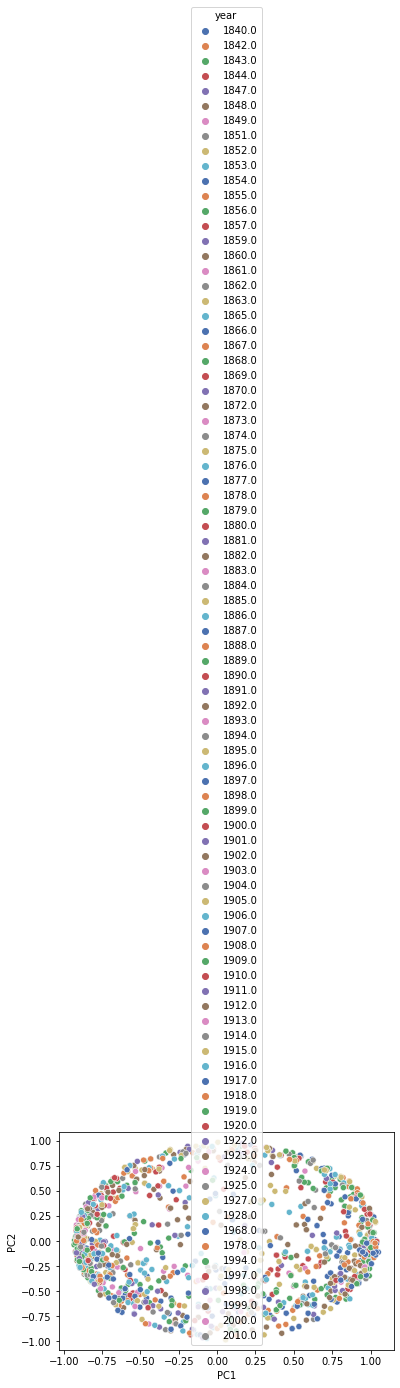

In [17]:
# sns.scatterplot(data=PCAs_Mw, x='PC1', y='PC2', hue=year_series, palette='deep')
sns.scatterplot(data=y_pca, x='PC1', y='PC2', hue=year_series, palette='deep')

#year_series

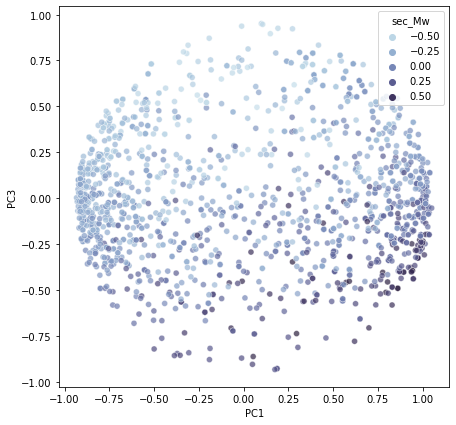

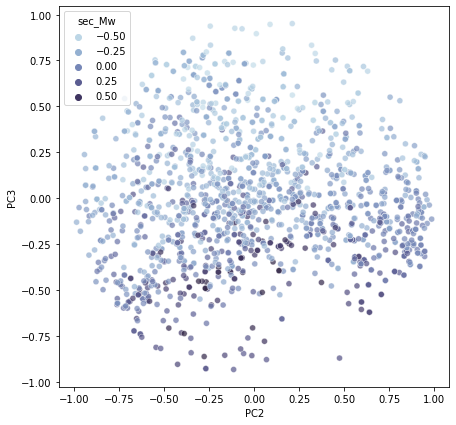

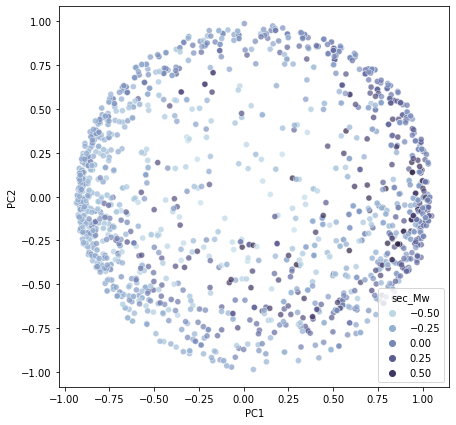

In [18]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=PCAs_Mw, x='PC1', y='PC3', hue='sec_Mw', palette="ch:s=.25,rot=-.25", alpha=0.7)
plt.show()

fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=PCAs_Mw, x='PC2', y='PC3', hue='sec_Mw', palette="ch:s=.25,rot=-.25", alpha=0.7)
plt.show()

fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=PCAs_Mw, x='PC1', y='PC2', hue='sec_Mw', palette="ch:s=.25,rot=-.25", alpha=0.7)
plt.show()

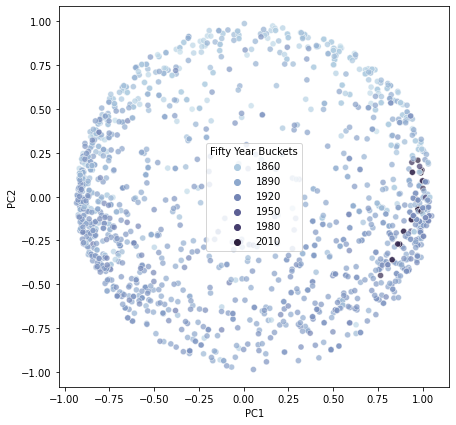

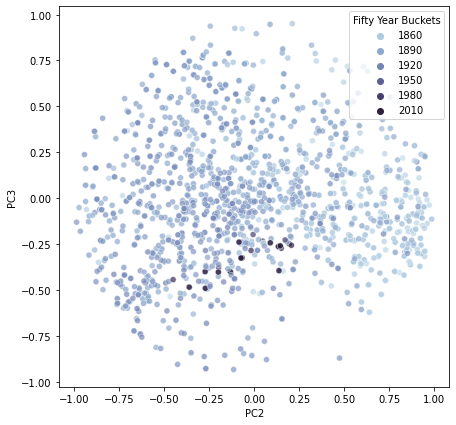

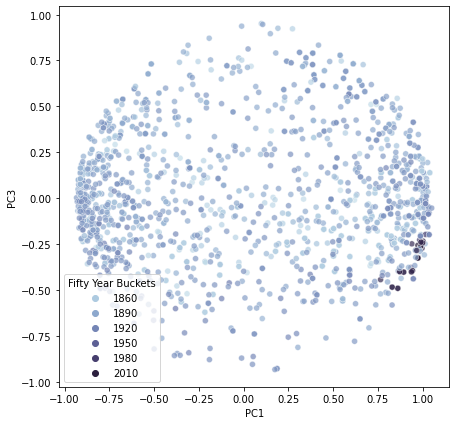

In [19]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=PCAs_Mw, x='PC1', y='PC2', hue=year_series, palette="ch:s=.25,rot=-.25", alpha=0.7)
plt.legend(title="Fifty Year Buckets")
plt.show()

fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=PCAs_Mw, x='PC2', y='PC3', hue=year_series, palette="ch:s=.25,rot=-.25", alpha=0.7)
plt.legend(title="Fifty Year Buckets")
plt.show()

fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=PCAs_Mw, x='PC1', y='PC3', hue=year_series, palette="ch:s=.25,rot=-.25", alpha=0.7)
plt.legend(title="Fifty Year Buckets")
plt.show()

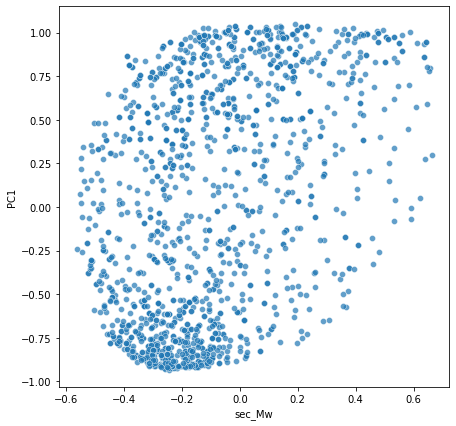

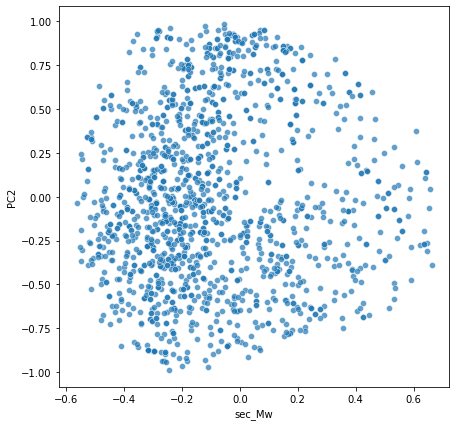

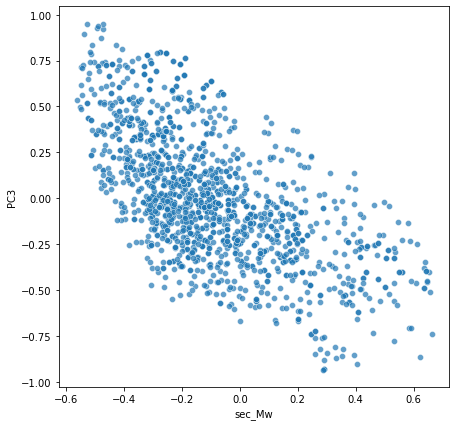

In [20]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=PCAs_Mw, y='PC1', x='sec_Mw', alpha=0.7)
plt.show()

fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=PCAs_Mw, y='PC2', x='sec_Mw', alpha=0.7)
plt.show()

fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=PCAs_Mw, y='PC3', x='sec_Mw', alpha=0.7)
plt.show()

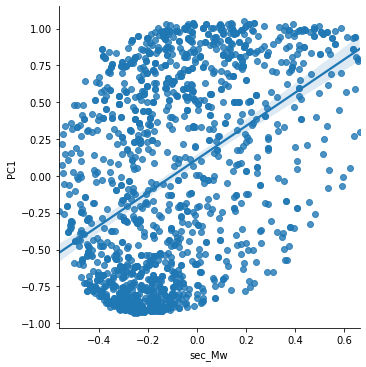

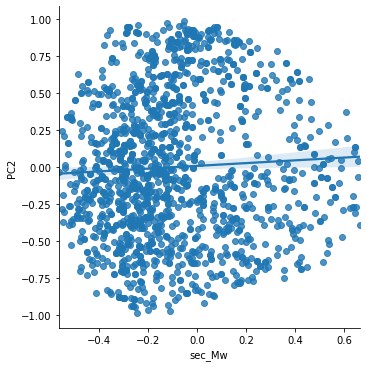

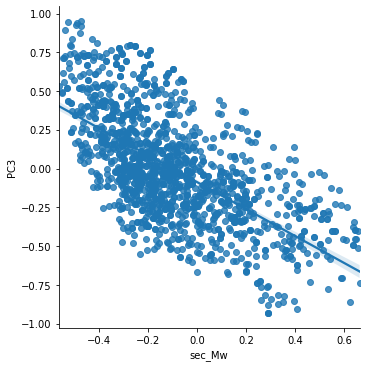

In [21]:
#fig, ax = plt.subplots(figsize=(7,7))
sns.lmplot(data=PCAs_Mw, y='PC1', x='sec_Mw')
#plt.show()

#fig, ax = plt.subplots(figsize=(7,7))
sns.lmplot(data=PCAs_Mw, y='PC2', x='sec_Mw')
#plt.show()

#fig, ax = plt.subplots(figsize=(7,7))
sns.lmplot(data=PCAs_Mw, y='PC3', x='sec_Mw')
#plt.show()

# Scree code

In [22]:
screePipe = pipeline.fit_transform(initData)
scree_pca = PCA(n_components=5)

In [23]:
screeFitTransf=scree_pca.fit_transform(screePipe)

In [24]:
screeFitTransf

array([[ 0.99780404,  0.50214267,  0.26721276,  0.09829407, -0.07602571],
       [-0.74584696,  0.4217836 ,  0.27754306, -0.00139416, -0.05098859],
       [-0.60917641, -0.3365888 ,  0.59554657, -0.05183721, -0.20856203],
       ...,
       [ 0.5119385 , -0.76873613,  0.47889017, -0.24810742, -0.17255974],
       [ 0.60079086, -0.55179293, -0.22115295, -0.55863334, -0.14452281],
       [ 0.5119385 , -0.76873613,  0.47889017, -0.24810742, -0.17255974]])

In [25]:
scree_df = pd.DataFrame(data = screeFitTransf, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5'])

In [26]:
scree_df.head()

,PC 1,PC 2,PC 3,PC 4,PC 5
0,0.997804,0.502143,0.267213,0.098294,-0.076026
1,-0.745847,0.421784,0.277543,-0.001394,-0.050989
2,-0.609176,-0.336589,0.595547,-0.051837,-0.208562
3,-0.468976,0.052054,0.349608,-0.380919,-0.637682
4,0.069412,0.915664,0.467992,0.199830,-0.129930


## SCREE PLOT

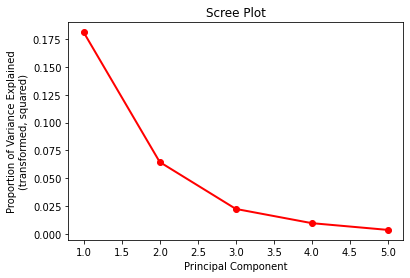

In [27]:
import matplotlib.pyplot as plt

scree_PC_Values = np.arange(scree_pca.n_components_) + 1
plt.plot(scree_PC_Values, np.square(scree_pca.explained_variance_ratio_), 'ro-', linewidth=2)
###We transformed the scree plot by squaring the variance explained to make the "ideal" PC more apparent
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained\n(transformed, squared)')
plt.show()